In [73]:
import time, json, requests
import pandas as pd
import datetime

# 每日疫情数据

In [2]:
#download data
def downloadDailyData():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
    data = json.loads(requests.get(url=url).json()['data'])
    return data

In [3]:
# decode area data to data frame
def getAreaDataFrame(response_data):
    area_tree = response_data['areaTree']
    df_area = pd.DataFrame(columns=['Country','Province','City','AllOrToday','confirm','suspect','dead','heal'])
    for country in area_tree:
        df_area = df_area.append({'Country':country['name'],
                   'Province':'',
                   'City':'',               
                   'AllOrToday':'All',
                   'confirm':country['total']['confirm'],
                   'suspect':country['total']['suspect'],
                   'dead':country['total']['dead'],
                   'heal':country['total']['heal']
                  },ignore_index=True)
        df_area = df_area.append({'Country':country['name'],
                   'Province':'',
                   'City':'',               
                   'AllOrToday':'Today',
                   'confirm':country['today']['confirm'],
                   'suspect':country['today']['suspect'],
                   'dead':country['today']['dead'],
                   'heal':country['today']['heal']
                  },ignore_index=True)
        if 'children' in country:
            country_tree = country['children']
            for province in country_tree:
                #print('pv:{}'.format(province['name']))
                df_area = df_area.append({'Country':country['name'],
                   'Province':province['name'],
                   'City':'',               
                   'AllOrToday':'All',
                   'confirm':province['total']['confirm'],
                   'suspect':province['total']['suspect'],
                   'dead':province['total']['dead'],
                   'heal':province['total']['heal']
                  },ignore_index=True)
                df_area = df_area.append({'Country':country['name'],
                   'Province':province['name'],
                   'City':'',               
                   'AllOrToday':'Today',
                   'confirm':province['today']['confirm'],
                   'suspect':province['today']['suspect'],
                   'dead':province['today']['dead'],
                   'heal':province['today']['heal']
                  },ignore_index=True)
                if 'children' in province:
                    province_tree = province['children']
                    for city in province_tree:
                        df_area = df_area.append({'Country':country['name'],
                           'Province':province['name'],
                           'City':city['name'],               
                           'AllOrToday':'All',
                           'confirm':city['total']['confirm'],
                           'suspect':city['total']['suspect'],
                           'dead':city['total']['dead'],
                           'heal':city['total']['heal']
                          },ignore_index=True)
                        df_area = df_area.append({'Country':country['name'],
                           'Province':province['name'],
                           'City':city['name'],               
                           'AllOrToday':'Today',
                           'confirm':city['today']['confirm'],
                           'suspect':city['today']['suspect'],
                           'dead':city['today']['dead'],
                           'heal':city['today']['heal']
                          },ignore_index=True)
    return df_area

In [4]:
def chinaSummary(data):
    data['chinaTotal']['AllOrToday'] = 'All'
    data['chinaAdd']['AllOrToday'] = 'Today'
    china_summary = pd.DataFrame.from_records([data['chinaTotal'],data['chinaAdd']])
    return china_summary

In [5]:
def getHistory(data):
    china_history_sum = pd.DataFrame.from_records(data['chinaDayList'])
    china_history_add = pd.DataFrame.from_records(data['chinaDayAddList'])
    return china_history_sum, china_history_add

In [7]:
def saveAll(data):
    last_time = data['lastUpdateTime'].replace(':','-')
    print(last_time)
    area_df = getAreaDataFrame(data)
    area_df.to_csv('data/infections/area_{}.csv'.format(last_time),index=False)
    summary = chinaSummary(data)
    summary.to_csv('data/infections/summary_{}.csv'.format(last_time),index=False)
    history_sum,history_add = getHistory(data)
    history_sum.to_csv('data/infections/history_sum_{}.csv'.format(last_time),index=False)
    history_add.to_csv('data/infections/history_add_{}.csv'.format(last_time),index=False)

In [8]:
# Run this function daily to save data
def updateNow():
    data = downloadDailyData()
    saveAll(data)
    return data

In [149]:
data = updateNow()

2020-02-07 12-28-24


In [150]:
df_area = getAreaDataFrame(data)

# 数据查询

In [151]:
#今日概览
chinaSummary(data)

,confirm,suspect,dead,heal,AllOrToday
0,31214,26359,637,1566,All
1,3154,1657,73,413,Today


In [152]:
#全球数据： 
df_area[(df_area['Province']=='') & (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
0,中国,,,All,31214,26359,637,1566
914,日本,,,All,45,0,0,1
916,新加坡,,,All,30,0,0,1
918,泰国,,,All,25,0,0,8
920,韩国,,,All,24,0,0,2
922,澳大利亚,,,All,15,0,0,5
924,马来西亚,,,All,14,0,0,1
926,德国,,,All,13,0,0,0
928,美国,,,All,12,0,0,1
930,越南,,,All,12,0,0,3


In [153]:
#全国数据： 
df_area[(df_area['Country']=='中国')& (df_area['City']=='') & (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
0,中国,,,All,31214,26359,637,1566
2,中国,湖北,,All,22112,0,618,817
40,中国,广东,,All,1018,0,1,72
84,中国,浙江,,All,1006,0,0,99
108,中国,河南,,All,914,0,3,68
148,中国,湖南,,All,772,0,0,101
178,中国,安徽,,All,665,0,0,34
212,中国,江西,,All,661,0,0,45
236,中国,重庆,,All,411,0,2,24
316,中国,江苏,,All,408,0,0,38


In [154]:
#各省数据： 
df_area[(df_area['Province']=='北京')& (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
422,中国,北京,,All,297,0,1,33
424,中国,北京,朝阳,All,51,0,0,0
426,中国,北京,海淀,All,47,0,0,0
428,中国,北京,西城,All,36,0,0,0
430,中国,北京,大兴,All,34,0,0,0
432,中国,北京,外地来京,All,24,0,0,0
434,中国,北京,丰台,All,22,0,0,0
436,中国,北京,昌平,All,17,0,0,0
438,中国,北京,通州,All,14,0,0,0
440,中国,北京,房山,All,13,0,0,0


In [155]:
#新增数据： All --> Today
df_area[(df_area['Province']=='北京') & (df_area['AllOrToday']=='Today')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
423,中国,北京,,Today,23,0,0,0
425,中国,北京,朝阳,Today,3,0,0,0
427,中国,北京,海淀,Today,0,0,0,0
429,中国,北京,西城,Today,2,0,0,0
431,中国,北京,大兴,Today,2,0,0,0
433,中国,北京,外地来京,Today,3,0,0,0
435,中国,北京,丰台,Today,2,0,0,0
437,中国,北京,昌平,Today,2,0,0,0
439,中国,北京,通州,Today,1,0,0,0
441,中国,北京,房山,Today,2,0,0,0


In [22]:
#累计确诊历史
getHistory(data)[0]

,confirm,suspect,dead,heal,date
0,41,0,1,0,01.13
1,41,0,1,0,01.14
2,41,0,2,5,01.15
3,45,0,2,8,01.16
4,62,0,2,12,01.17
5,198,0,3,17,01.18
6,275,0,4,18,01.19
7,291,54,6,25,01.20
8,440,37,9,25,01.21
9,571,393,17,25,01.22


In [23]:
#新增确诊历史
getHistory(data)[1]

,confirm,suspect,dead,heal,date
0,77,27,0,0,01.20
1,149,53,3,0,01.21
2,131,257,8,0,01.22
3,259,680,8,6,01.23
4,444,1118,16,3,01.24
5,688,1309,15,11,01.25
6,769,3806,24,2,01.26
7,1771,2077,26,9,01.27
8,1459,3248,26,43,01.28
9,1737,4148,38,21,01.29


# 患者小区查询
一个来源：腾讯 https://ncov.html5.qq.com/community?channelid=17


In [85]:
def getCommunityDataFrame():
    getCommunity_url = 'https://ncov.html5.qq.com/api/getCommunity?'
    data = requests.get(url=getCommunity_url).json()['community']
    all_records=[]
    for province in data:
        p_data = data[province]
        for city in p_data:
            c_data = p_data[city]
            for district in c_data:        
                d_data = c_data[district]
                for record in d_data:
                    all_records.append(record)                
    df_community = pd.DataFrame.from_records(all_records) 
    return df_community
def saveCommunityData(df_community):
    localtime = datetime.datetime.now().strftime("%y-%m-%d-%H-%M-EST")
    df_community.to_csv('data/infections/community_{}.csv'.format(localtime),index=False)
def updateCommunity():
    df = getCommunityDataFrame()
    saveCommunityData(df)

In [86]:
updateCommunity()

## 社区数据 in Geopandas

In [132]:
import geopandas as gpd
df = getCommunityDataFrame()
df_geo = df[['province','city','district','full_address','cnt_sum_certain','lng','lat']]
df_geo = df_geo.astype({'cnt_sum_certain':'int32','lng': 'float64','lat': 'float64'})
gpd.GeoDataFrame(
    gdf, geometry=gpd.points_from_xy(df_geo.lng, df_geo.lat))
gdf

,province,city,district,full_address,cnt_sum_certain,lng,lat,geometry
0,云南省,昆明市,东川区,云南省昆明市东川区乌龙镇瓦房村黄包谷地,1,103.079323,25.975559,POINT (103.07932 25.97556)
1,云南省,昆明市,五华区,云南省昆明市五华区春晖小区,2,102.679253,25.051399,POINT (102.67925 25.05140)
2,云南省,昆明市,五华区,云南省昆明市五华区耀龙康城,1,102.730247,25.098301,POINT (102.73025 25.09830)
3,云南省,昆明市,五华区,云南省昆明市五华区新闻里小区,2,102.692291,25.034473,POINT (102.69229 25.03447)
4,云南省,昆明市,五华区,云南省昆明市五华区西景盛典小区,1,102.707370,25.043470,POINT (102.70737 25.04347)
...,...,...,...,...,...,...,...,...
2475,黑龙江省,齐齐哈尔市,龙江县,黑龙江省齐齐哈尔市龙江县七道街明亮花苑小区,5,123.184921,47.339272,POINT (123.18492 47.33927)
2476,黑龙江省,齐齐哈尔市,龙沙区,黑龙江省齐齐哈尔市龙沙区公园社区新特药旁宾馆,1,123.961250,47.335941,POINT (123.96125 47.33594)
2477,黑龙江省,齐齐哈尔市,龙沙区,黑龙江省齐齐哈尔市龙沙区安顺小区集资楼6号楼,1,123.924446,47.331455,POINT (123.92445 47.33145)
2478,黑龙江省,齐齐哈尔市,龙沙区,黑龙江省齐齐哈尔市龙沙区江安街道,1,123.926010,47.326031,POINT (123.92601 47.32603)


In [133]:
df_geo

,province,city,district,full_address,cnt_sum_certain,lng,lat
0,云南省,昆明市,东川区,云南省昆明市东川区乌龙镇瓦房村黄包谷地,1,103.079323,25.975559
1,云南省,昆明市,五华区,云南省昆明市五华区春晖小区,2,102.679253,25.051399
2,云南省,昆明市,五华区,云南省昆明市五华区耀龙康城,1,102.730247,25.098301
3,云南省,昆明市,五华区,云南省昆明市五华区新闻里小区,2,102.692291,25.034473
4,云南省,昆明市,五华区,云南省昆明市五华区西景盛典小区,1,102.707370,25.043470
...,...,...,...,...,...,...,...
2475,黑龙江省,齐齐哈尔市,龙江县,黑龙江省齐齐哈尔市龙江县七道街明亮花苑小区,5,123.184921,47.339272
2476,黑龙江省,齐齐哈尔市,龙沙区,黑龙江省齐齐哈尔市龙沙区公园社区新特药旁宾馆,1,123.961250,47.335941
2477,黑龙江省,齐齐哈尔市,龙沙区,黑龙江省齐齐哈尔市龙沙区安顺小区集资楼6号楼,1,123.924446,47.331455
2478,黑龙江省,齐齐哈尔市,龙沙区,黑龙江省齐齐哈尔市龙沙区江安街道,1,123.926010,47.326031


In [135]:
df_geo['province']=='湖北省'

0       False
1       False
2       False
3       False
4       False
        ...  
2475    False
2476    False
2477    False
2478    False
2479    False
Name: province, Length: 2480, dtype: bool

In [134]:
df_geo[df_geo['province']=='湖北省']

,province,city,district,full_address,cnt_sum_certain,lng,lat


In [139]:
m_gdf = gdf.loc[gdf['province']=='北京市']


In [143]:
m_gdf.crs = {'init' :'epsg:4326'}

In [144]:
m_gdf.crs

{'init': 'epsg:4326'}

In [145]:
m_gdf = m_gdf.to_crs(epsg=3857)

In [146]:
m_gdf

,province,city,district,full_address,cnt_sum_certain,lng,lat,geometry
2414,北京市,北京市,东城区,北京市东城区体育馆路街道驹章胡同,-1,116.425087,39.889252,POINT (12960381.400 4849861.709)
2415,北京市,北京市,大兴区,北京市大兴区瀛海镇金茂悦北区5号院,-1,116.484139,39.754539,POINT (12966955.039 4830336.407)
2416,北京市,北京市,大兴区,北京市大兴区观音寺街道双河南里,-1,116.347168,39.734291,POINT (12951707.497 4827404.966)
2417,北京市,北京市,大兴区,北京市大兴区黄村镇格林云墅,-1,116.401649,39.708168,POINT (12957772.294 4823624.233)
2418,北京市,北京市,怀柔区,北京市怀柔区庙城镇郑重庄村,-1,116.616211,40.285912,POINT (12981657.227 4907577.634)
2419,北京市,北京市,朝阳区,北京市朝阳区东坝乡恒大江湾,-1,116.531891,39.969803,POINT (12972270.767 4861555.104)
2420,北京市,北京市,朝阳区,北京市朝阳区北苑路86号嘉铭园,-1,116.422120,40.002160,POINT (12960051.115 4866256.170)
2421,北京市,北京市,朝阳区,北京市朝阳区慈云寺北里,-1,116.494980,39.917599,POINT (12968161.854 4853975.206)
2422,北京市,北京市,朝阳区,北京市朝阳区高碑店乡陶家湾,-1,116.542572,39.905300,POINT (12973459.771 4852190.261)
2423,北京市,北京市,朝阳区,北京市朝阳区来广营乡筑华年,-1,116.427711,40.036083,POINT (12960673.503 4871187.149)


## 位置图预览

In [147]:
import contextily as ctx

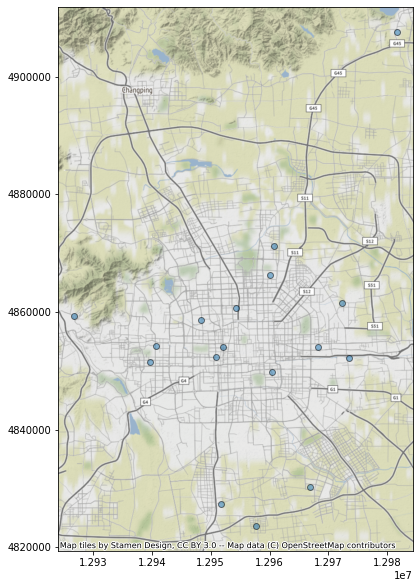

In [148]:
ax = m_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# 患者同行数据
三个来源：搜狗/人民日报/腾讯

搜狗
https://sa.sogou.com/new-weball/page/sgs/epidemic/yyxw?type_page=yangshi&scene=2&clicktime=1580381964&enterid=1580381964&from=timeline&isappinstalled=0

In [29]:
sogou_trips = pd.read_json('https://hhyfeed.sogoucdn.com/js/common/epidemic-search/main.js')
sogou_trips.to_csv('data/trips/sogou_trips.csv')

人民日报 http://2019ncov.nosugartech.com/search.html?t_date=&t_no=&t_area=

In [30]:
url_trip = 'http://2019ncov.nosugartech.com/data.json?'
json_res = requests.get(url=url_trip).json()['data']
nosugar_trips = pd.DataFrame.from_records(json_res)
nosugar_trips.to_csv('data/trips/nosugar_trips.csv')

腾讯 https://rl.inews.qq.com/h5/trip?from=newsapp

In [87]:
tx_trip_url = 'https://rl.inews.qq.com/taf/travelFront'
json_res = requests.get(url=tx_trip_url).json()['data']['list']
tx_trips = pd.DataFrame.from_records(json_res)
tx_trips.to_csv('data/trips/tx_trips.csv')

In [27]:
tx_trips

,date,start,end,type,no,no_sub,memo,pos_start,pos_end,source,who
0,2020-02-03,,,1,MF810,,,,福州,https://m.weibo.cn/status/4469031496679960?ope...,
1,2020-02-03,,,2,G1408,13号车厢,,广州南,南昌西,https://m.weibo.cn/status/4468528998833555?ope...,湖南疾控
2,2020-02-03,,,4,湘A02906D,,,桂花村,,https://m.weibo.cn/1740557654/4468675682159071,金鹰955电台
3,2020-02-03,,,5,渭南6路,,1人确诊,火车站,第二医院,https://weibo.com/6072764925/IsOpetYEL?type=co...,渭南同城
4,2020-02-02,,,6,黑AE888Z,网约车,,南极国际小区,哈尔滨传染病院,https://mp.weixin.qq.com/s/RPfahGQ_Gg483fv3Bah4BQ,人民日报
...,...,...,...,...,...,...,...,...,...,...,...
1844,2020-01-04,,,2,K1282,6车厢,不详,深圳东,光山,http://www.huangchuan.gov.cn/xinwen/tzgg/2020B...,潢川人民政府
1845,2020-01-03,,,2,K628,8车厢,1人确诊,宜昌东,西安,https://baijiahao.baidu.com/s?id=1657495493717...,兰州新闻网
1846,2019-12-27,,,2,Z14,10号车厢,,广州东,沈阳北,http://www.zgcy.gov.cn/ZGCY/zwgk/20200131/0040...,朝阳市新型肺炎疫情防控指挥部办公室
1847,2019-12-27,,,2,Z11/Z14,10号车厢,,长沙,沈阳北,http://www.zgcy.gov.cn/ZGCY/zwgk/20200131/0040...,朝阳市新型冠状病毒感染的肺炎疫情防控指挥部办公室
